In [17]:
import sys
import os
print(sys.version)
print(sys.path)

import numpy as np
import glob 
from PIL import Image 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from pathlib import Path

3.7.2 (default, Feb 26 2020, 10:31:40) 
[GCC 5.4.0 20160609]
['/data/guom0014/fyp_code/CycleGAN', '/home2/guom0014/fyp/venv2/lib/python37.zip', '/home2/guom0014/fyp/venv2/lib/python3.7', '/home2/guom0014/fyp/venv2/lib/python3.7/lib-dynload', '/usr/local/lib/python3.7', '', '/home2/guom0014/fyp/venv2/lib/python3.7/site-packages', '/home2/guom0014/fyp/venv2/lib/python3.7/site-packages/IPython/extensions', '/home2/guom0014/.ipython']


In [18]:
path_to_raw = './datasets/ct2mri_raw/'
path_to_target = './datasets/ct2mri_tiny/'

# Safely make target directory
Path(path_to_target + "train/A").mkdir(parents=True, exist_ok=True)
Path(path_to_target + "train/B").mkdir(parents=True, exist_ok=True)
Path(path_to_target + "test/A").mkdir(parents=True, exist_ok=True)
Path(path_to_target + "test/B").mkdir(parents=True, exist_ok=True)

In [19]:
imglistA = glob.glob(path_to_raw + 'A/*' )
imglistB = glob.glob(path_to_raw + 'B/*' )

In [20]:
img_A = np.array([np.array(Image.open(fname)) for fname in imglistA])
img_B = np.array([np.array(Image.open(fname)) for fname in imglistB])

In [21]:
print(f'CT image count: {img_A.shape[0]}')
print(f'MRI image count: {img_B.shape[0]}')

CT image count: 18950
MRI image count: 18950


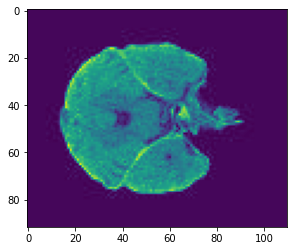

In [22]:
plt.imshow(img_A[0,:,:])

In [23]:
# Sample a subset
_, A_subset = train_test_split(img_A, test_size = 100)
_, B_subset = train_test_split(img_B, test_size = 100)
A_subset.shape

(100, 92, 110)

In [24]:
# Training and test set -> CT(CQ500)
x1, x2 = train_test_split(A_subset, test_size = .15)
for i, img in enumerate(x1):
    canvas = np.zeros([max(img.shape), max(img.shape)], dtype='uint8')
    canvas[:img.shape[0], :img.shape[1]] = img
    img = Image.fromarray(canvas, mode='L')
    img.save(path_to_target + 'train/A/' + 'CQ500_train_' + str(i) + '.jpg')

for i, img in enumerate(x2):
    canvas = np.zeros([max(img.shape), max(img.shape)], dtype='uint8')
    canvas[:img.shape[0], :img.shape[1]] = img
    img = Image.fromarray(canvas, mode='L')
    img.save(path_to_target + 'test/A/' + 'CQ500_test_' + str(i) + '.jpg')

In [25]:
# Training and test set -> MRI(PD)
x1, x2 = train_test_split(B_subset, test_size = .15)
for i, img in enumerate(x1):
    canvas = np.zeros([max(img.shape), max(img.shape)], dtype='uint8')
    canvas[:img.shape[0], :img.shape[1]] = img
    img = Image.fromarray(canvas, mode='L')
    img.save(path_to_target + 'train/B/' + 'PD_train_' + str(i) + '.jpg')

for i, img in enumerate(x2):
    canvas = np.zeros([max(img.shape), max(img.shape)], dtype='uint8')
    canvas[:img.shape[0], :img.shape[1]] = img
    img = Image.fromarray(canvas, mode='L')
    img.save(path_to_target + 'test/B/' + 'PD_test_' + str(i) + '.jpg')